# Investigating Correlation between Blockchain ETF and Cryptocurrency Prices
We are investigating the Elwood Blockchain Global Equity Index. All prices are in USD unless otherwise indicated.
For comparative cryptocurrencies, we choose the three biggest cryptocurrencies by market capitalisation as of May 4th 2021: Bitcoin (BTC), Ethereum (ETH) and Binance (BNB).

## Imports

In [41]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import math

## Load Data

### Load Historic ETF Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices as traded on the Milan Stock Exchange.

In [42]:
# Store date against closing price
etf_dates = []
etf_prices = []
etf_data = {}

with open("data/BCHN-MI.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            etf_dates.append(date)
            etf_prices.append(price)
            etf_data[date] = price
        except ValueError:
            pass
        
print(f"Number of ETF closing prices: {len(etf_dates)}.")

Number of ETF closing prices: 530.


### Load Historic Bitcoin Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices from CCC - CoinMarketCap.

In [43]:
#Store date against closing price
btc_dates = []
btc_prices = []
btc_data = {}

with open("data/BTC-USD.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            btc_dates.append(date)
            btc_prices.append(price)
            btc_data[date] = price
        except ValueError:
            pass
        
print(f"Number of BTC closing prices: {len(btc_dates)}.")

Number of BTC closing prices: 2416.


### Load Historic Ethereum Prices
The data was downloaded from Yahoo Finance on May 4th with daily prices from CCC - CoinMarketCap.

In [44]:
#Store date against closing price
eth_dates = []
eth_prices = []
eth_data = {}

with open("data/ETH-USD.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            eth_dates.append(date)
            eth_prices.append(price)
            eth_data[date] = price
        except ValueError:
            pass
        
print(f"Number of ETH closing prices: {len(eth_dates)}.")

Number of ETH closing prices: 2094.


### Load Historic Binance Prices
The data was downloaded from Yahoo Finance on May 4th with daily prices from CCC - CoinMarketCap.

In [45]:
#Store date against closing price
bnb_dates = []
bnb_prices = []
bnb_data = {}

with open("data/BNB-USD.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            bnb_dates.append(date)
            bnb_prices.append(price)
            bnb_data[date] = price
        except ValueError:
            pass
        
print(f"Number of BNB closing prices: {len(bnb_dates)}.")

Number of BNB closing prices: 1376.


## Analysis

### Plot Raw Prices
Over full duration of data collection.

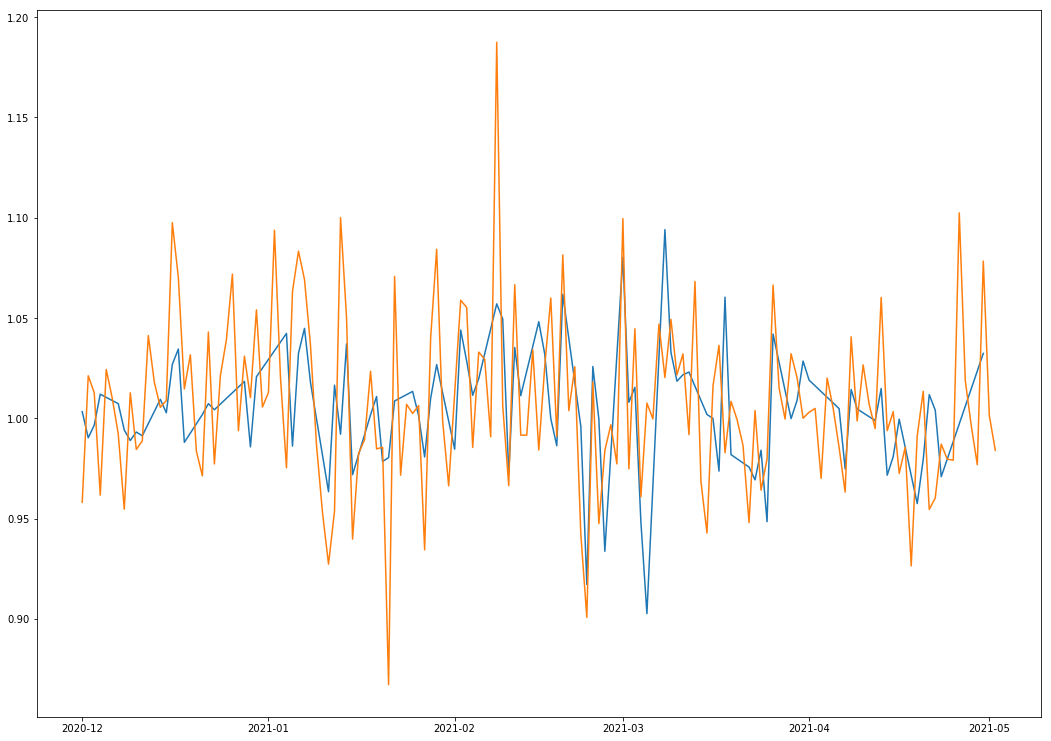

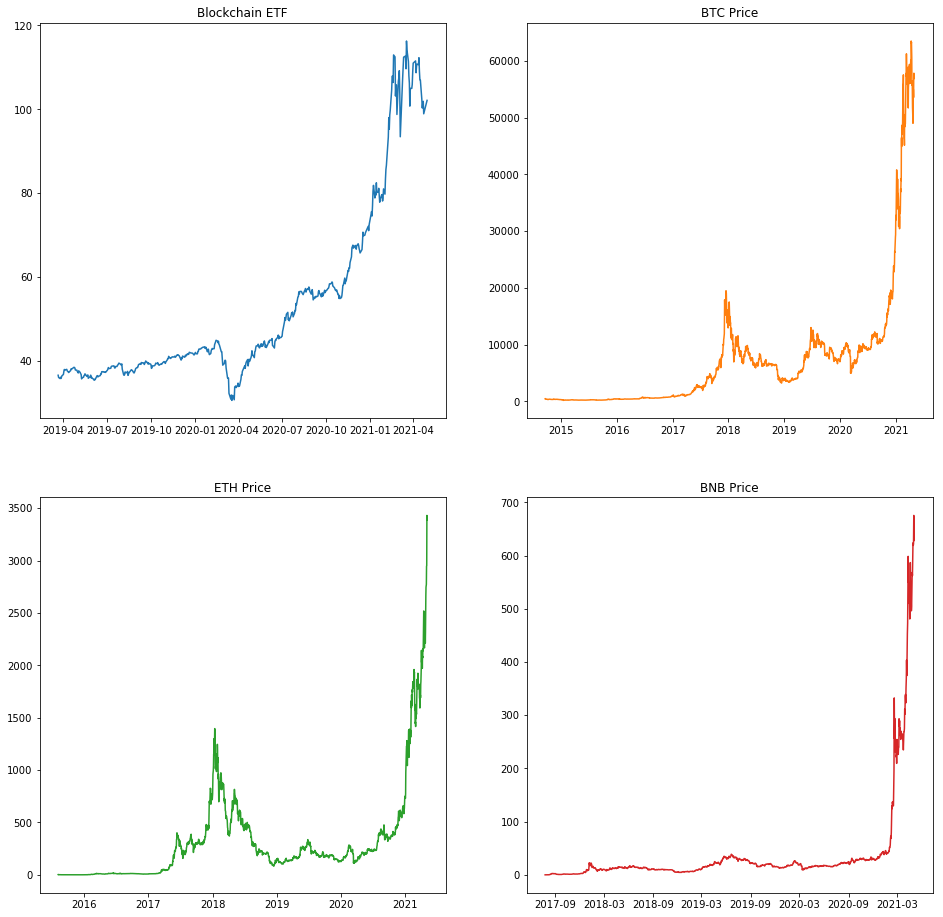

In [46]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16, 16)

axs[0, 0].set_title('Blockchain ETF')
axs[0, 0].plot(etf_dates, etf_prices)

axs[0, 1].set_title('BTC Price')
axs[0, 1].plot(btc_dates, btc_prices, 'tab:orange')

axs[1, 0].set_title('ETH Price')
axs[1, 0].plot(eth_dates, eth_prices, 'tab:green')

axs[1, 1].set_title('BNB Price')
axs[1, 1].plot(bnb_dates, bnb_prices, 'tab:red')

plt.show()

### Plot Price Overlay
Overlay the prices of the ETF and Bitcoin from the day of the ETF creation. Normalize both to start at price 100 on day 0 of ETF.

In [103]:
# Add a delay to when to graph from, in ETF trading days
orig_start_days = 450

start_days = orig_start_days
start_day = etf_dates[1+start_days]

# Start price
base_index = 100

In [104]:
# Index ETF Price at 100
etf_price_indexed = []
index = base_index
for i in range(1+start_days, len(etf_prices)):
    index = index * etf_prices[i] / etf_prices[i-1]
    etf_price_indexed.append(index)
    
    
# Index BTC Price at 100
btc_match = 0
for i in range(len(btc_prices)):
    if btc_dates[i] == start_day:
        btc_match = i
        break
        
btc_price_indexed = []
index = base_index
for i in range(btc_match, len(btc_prices)):
    index = index * btc_prices[i] / btc_prices[i-1]
    btc_price_indexed.append(index)
    
    
# Index ETH Price at 100
eth_match = 0
for i in range(len(eth_prices)):
    if eth_dates[i] == start_day:
        eth_match = i
        break
        
eth_price_indexed = []
index = base_index
for i in range(eth_match, len(eth_prices)):
    index = index * eth_prices[i] / eth_prices[i-1]
    eth_price_indexed.append(index)
    
    
# Index BNB Price at 100
bnb_match = 0
for i in range(len(bnb_prices)):
    if bnb_dates[i] == start_day:
        bnb_match = i
        break
        
bnb_price_indexed = []
index = base_index
for i in range(bnb_match, len(bnb_prices)):
    index = index * bnb_prices[i] / bnb_prices[i-1]
    bnb_price_indexed.append(index) 

In [105]:
print(len(etf_price_indexed), len(btc_price_indexed), len(eth_price_indexed), len(bnb_price_indexed))

79 119 121 121


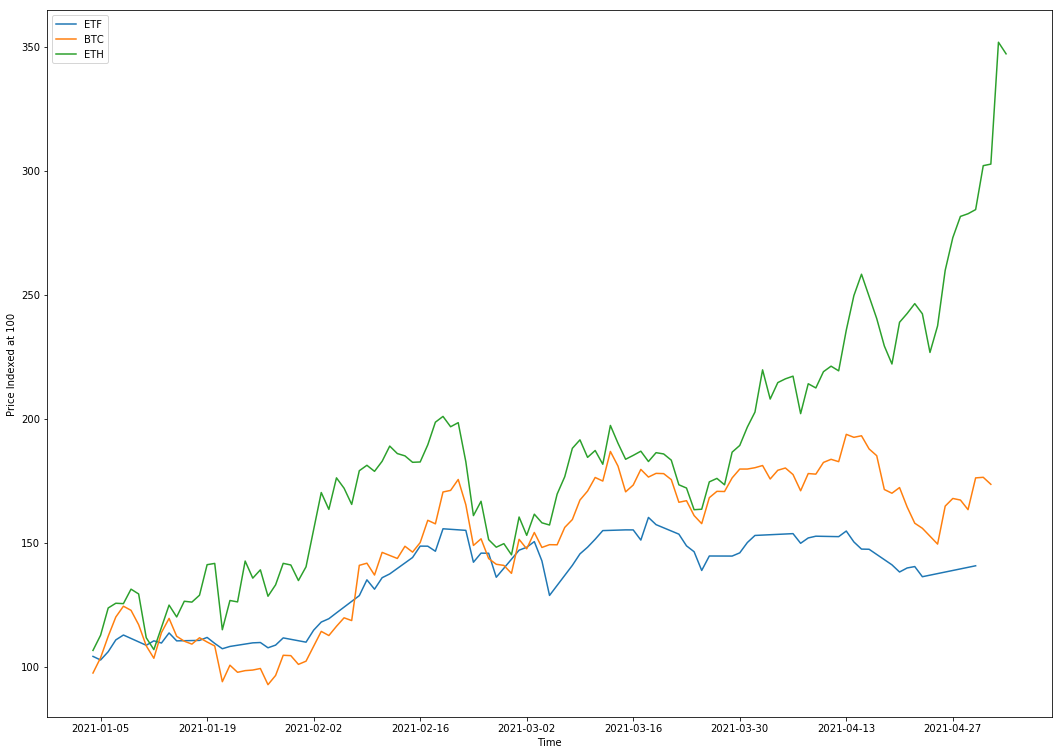

In [106]:
plt.figure(figsize=(18,13))
plt.plot(etf_dates[start_days+1:], etf_price_indexed, label="ETF")
plt.plot(btc_dates[btc_match:], btc_price_indexed, 'tab:orange', label="BTC")
plt.plot(eth_dates[eth_match:], eth_price_indexed, 'tab:green', label="ETH")
#plt.plot(bnb_dates[bnb_match:], bnb_price_indexed, 'tab:red', label="BNB")
plt.xlabel("Time")
plt.ylabel("Price Indexed at 100")
plt.legend()
plt.show()

### Plot Price Change Overlay
Overlay the price changes of the ETF and Bitcoin from the day of the ETF creation. Normalize both to start at price 100 on day 0 of ETF.

In [113]:
# Adjust start date if wanted
start_days = orig_start_days + 50
start_day = etf_dates[1+start_days]

In [114]:
# Index ETF Price at 100
etf_price_change = []
for i in range(1+start_days, len(etf_prices)):
    index = etf_prices[i] / etf_prices[i-1]
    etf_price_change.append(index)
    
    
# Index BTC Price at 100
btc_match = 0
for i in range(len(btc_prices)):
    if btc_dates[i] == start_day:
        btc_match = i
        break
        
btc_price_change = []
for i in range(btc_match, len(btc_prices)):
    index = btc_prices[i] / btc_prices[i-1]
    btc_price_change.append(index)
    
    
# Index ETH Price at 100
eth_match = 0
for i in range(len(eth_prices)):
    if eth_dates[i] == start_day:
        eth_match = i
        break
        
eth_price_change = []
for i in range(eth_match, len(eth_prices)):
    index = eth_prices[i] / eth_prices[i-1]
    eth_price_change.append(index)
    
    
# Index BNB Price at 100
bnb_match = 0
for i in range(len(bnb_prices)):
    if bnb_dates[i] == start_day:
        bnb_match = i
        break
        
bnb_price_change = []
for i in range(bnb_match, len(bnb_prices)):
    index = bnb_prices[i] / bnb_prices[i-1]
    bnb_price_change.append(index) 

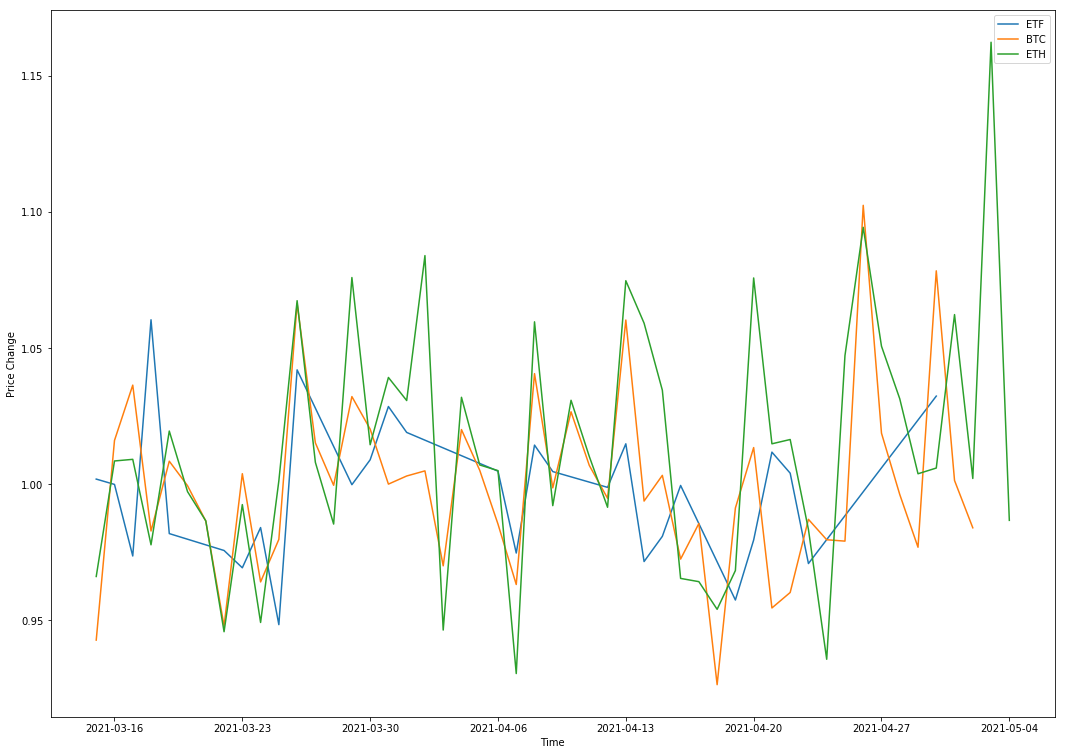

In [115]:
plt.figure(figsize=(18,13))
plt.plot(etf_dates[start_days+1:], etf_price_change, label="ETF")
plt.plot(btc_dates[btc_match:], btc_price_change, 'tab:orange', label="BTC")
plt.plot(eth_dates[eth_match:], eth_price_change, 'tab:green', label="ETH")
#plt.plot(bnb_dates[bnb_match:], bnb_price_change, 'tab:red', label="BNB")
plt.xlabel("Time")
plt.ylabel("Price Change")
plt.legend()
plt.show()